# Import Libraries

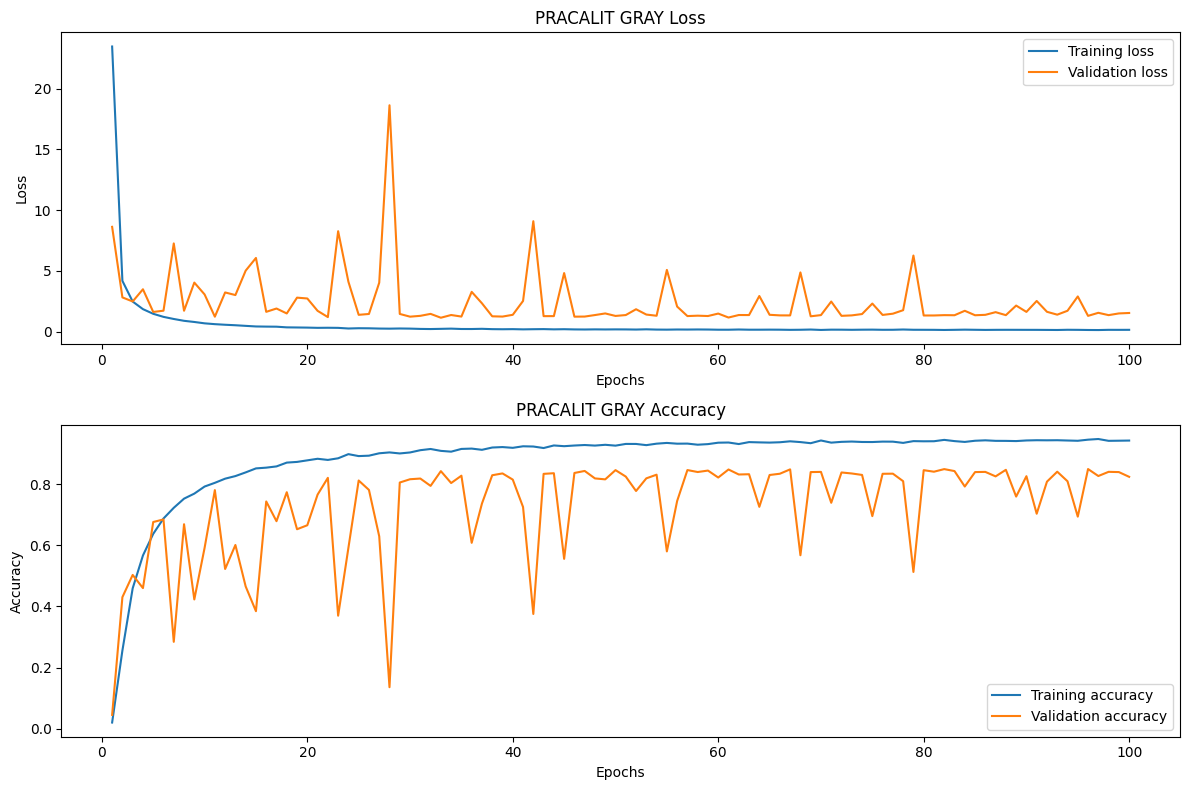

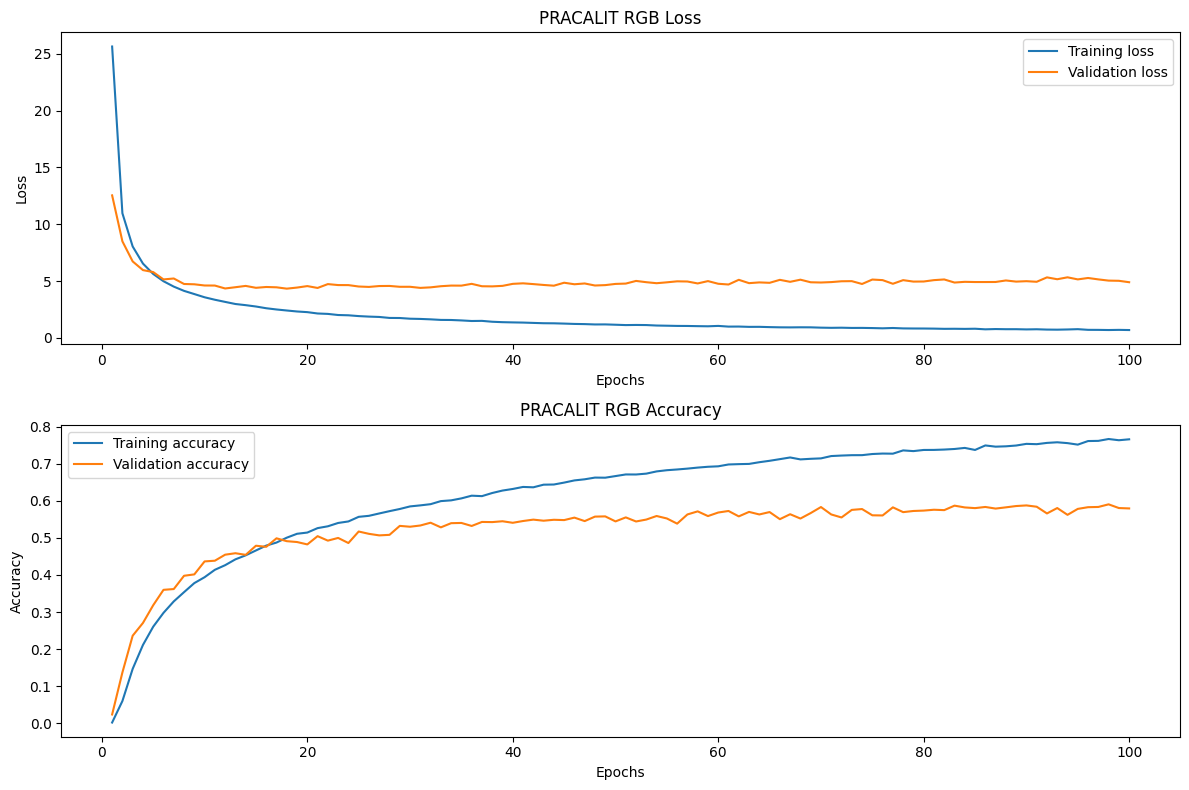

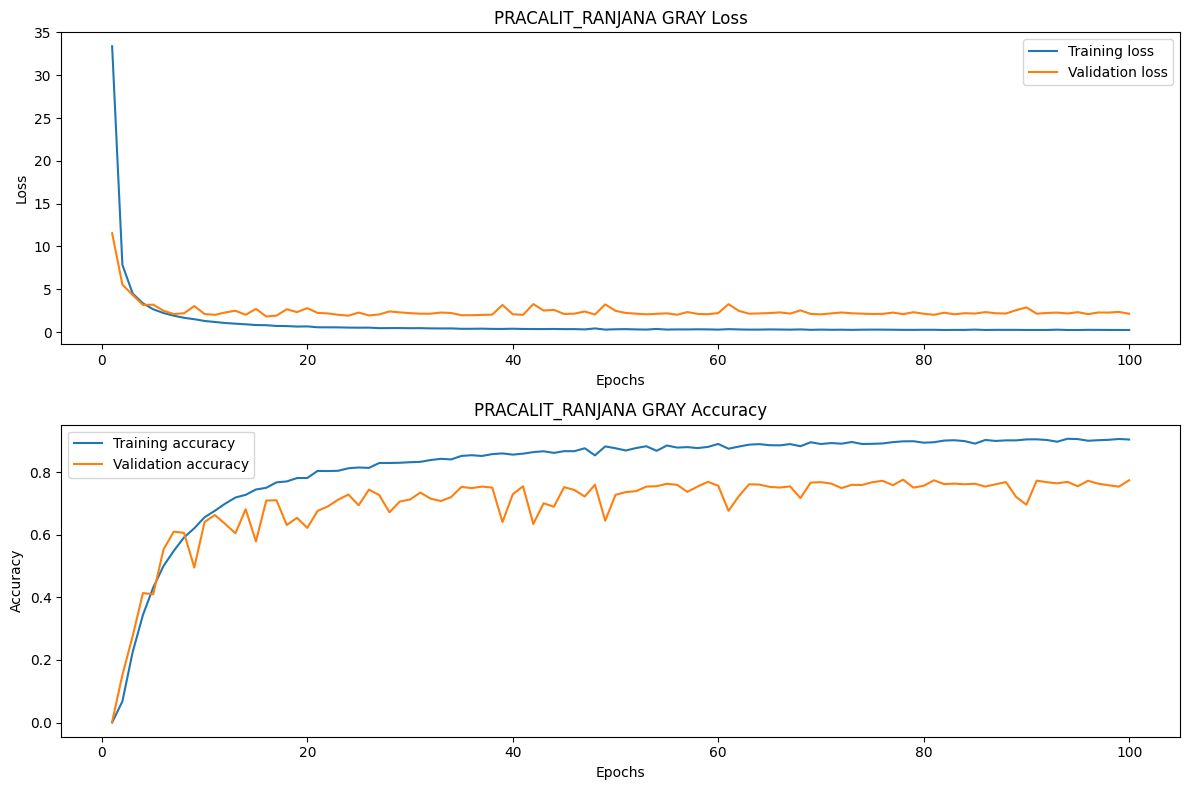

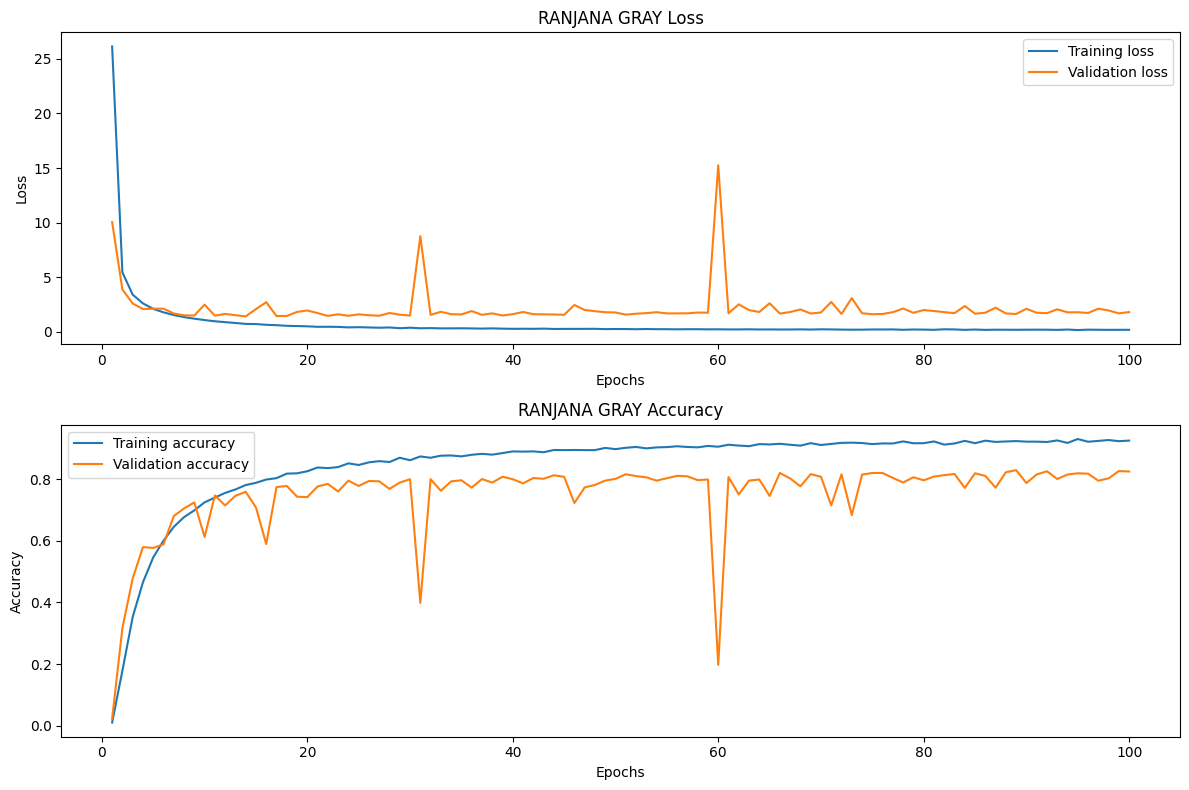

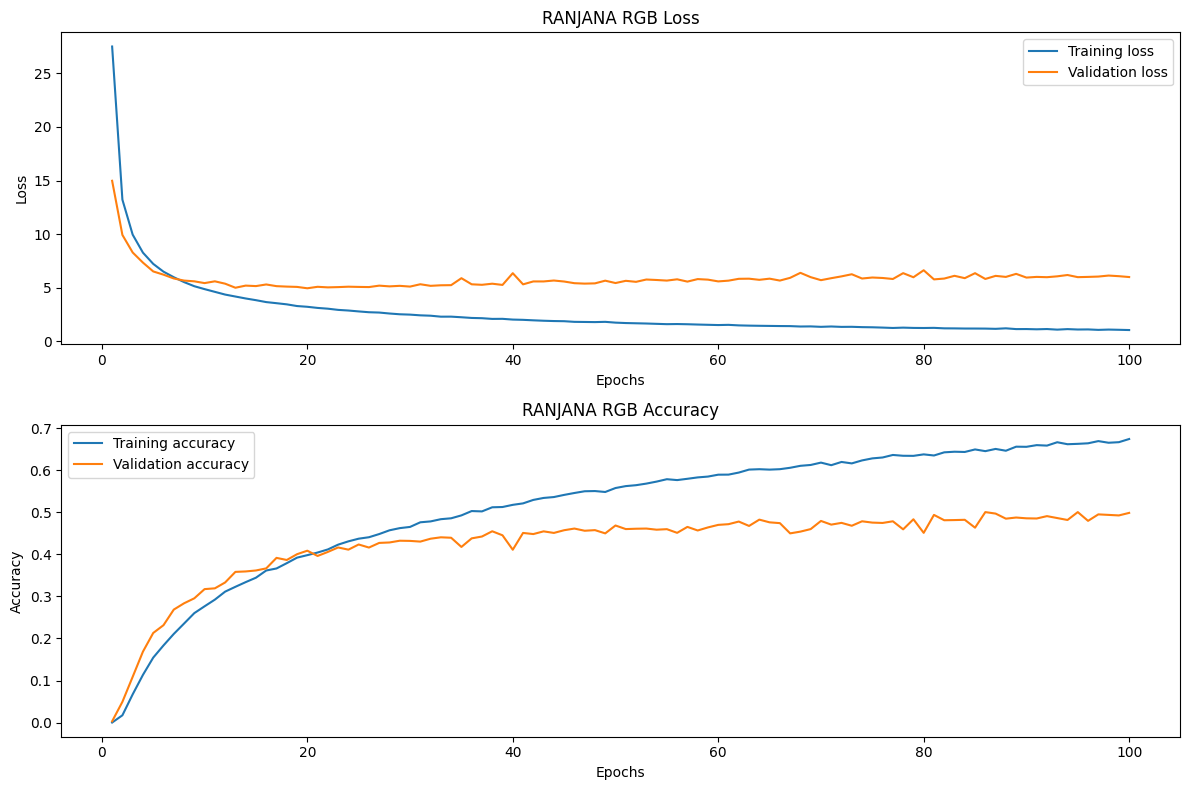

In [7]:
import os
import pickle
import matplotlib.pyplot as plt

def load_history(path):
    with open(path, 'rb') as file:
        history = pickle.load(file)
    return history

def extract_metrics(history):
    val_loss = history.get('val_loss', [])
    train_loss = history.get('loss', [])
    val_accuracy = history.get('val_accuracy', [])
    train_accuracy = history.get('accuracy', [])
    return val_loss, train_loss, val_accuracy, train_accuracy

def traverse_directories(base_path):
    metrics = {}
    for root, _, files in os.walk(base_path):
        if 'history.pkl' in files:
            full_path = os.path.join(root, 'history.pkl')
            history = load_history(full_path)
            val_loss, train_loss, val_accuracy, train_accuracy = extract_metrics(history)
            model_name = os.path.relpath(root, base_path)
            metrics[model_name] = {
                'val_loss': val_loss,
                'train_loss': train_loss,
                'val_accuracy': val_accuracy,
                'train_accuracy': train_accuracy
            }
    return metrics

def plot_metrics(metrics):
    figures_folder = 'figures/lr_001'
    os.makedirs(figures_folder, exist_ok=True)
    for model_name, metric in metrics.items():
        epochs = range(1, len(metric['train_loss']) + 1)
        model_name = model_name.replace("\\", " ").upper()
        plt.figure(figsize=(12, 8))

        # Plot loss
        plt.subplot(2, 1, 1)
        plt.plot(epochs, metric['train_loss'], label='Training loss')
        plt.plot(epochs, metric['val_loss'], label='Validation loss')
        plt.title(model_name +' Loss')
        plt.xlabel('Epochs')
        plt.ylabel('Loss')
        plt.legend()

        # Plot accuracy
        plt.subplot(2, 1, 2)
        plt.plot(epochs, metric['train_accuracy'], label='Training accuracy')
        plt.plot(epochs, metric['val_accuracy'], label='Validation accuracy')
        plt.title(model_name + ' Accuracy')
        plt.xlabel('Epochs')
        plt.ylabel('Accuracy')
        plt.legend()

        plt.tight_layout()
        plot_filename = os.path.join(figures_folder, f'{model_name}.png')
        plt.savefig(plot_filename)
        plt.show();
# Change this to the path where your models directory is located
base_path = 'models'

metrics = traverse_directories(base_path)
plot_metrics(metrics)
